# Steel defects


##  Background: 
Steel plate defects are extracted from photos of several faulty steel plates with surface imperfections. Image analysis revealed 27 different features to describe the steel fault. A total of 6 unique types of faults are categorized, with a final category of "other faults" for any type of fault that does not fit into the other specific 6 categories.

Features: There are 27 features that are used to predict the steel faults. These features are extracted from steel plate samples. Computer vision can automatically extract some of this information from images or manually extracted with a user inspecting each plate defect or photo of the steel plate.

* X_Minimum
* X_Maximum
* Y_Minimum
* Y_Maximum
* Pixels_Areas
* X_Perimeter
* Y_Perimeter
* Sum_of_Luminosity
* Minimum_of_Luminosity
* Maximum_of_Luminosity
* Length_of_Conveyer
* TypeOfSteel_A300
* TypeOfSteel_A400
* Steel_Plate_Thickness
* Edges_Index
* Empty_Index
* Square_Index
* Outside_X_Index
* Edges_X_Index
* Edges_Y_Index
* Outside_Global_Index
* LogOfAreas
* Log_X_Index
* Log_Y_Index
* Orientation_Index
* Luminosity_Index
* SigmoidOfAreas

## Labels: 
There are 7 types of steel plate defects that are labelled with a 1 if present and 0 if not present with One-Hot Encoding. A unique aspect of this data set is that the labels are imbalanced, meaning that there is a large difference in the number of specific defects.

* Pastry
* Z_Scratch
* K_Scatch
* Stains
* Dirtiness
* Bumps
* Other_Faults

In cases where there is a large imbalance, a strategy is to synthetically generate new data sets to improve the balance. That strategy is not taken in this case study but could be an option to improve the classification training. The fault label is not stored as a sequential value (e.g. fault label as 0-6) but is One-hot encoded to translate the fault label into a binary representation (0 or 1) for each fault. There are 7 additional columns of data with 1 if the fault exists and 0 if the fault does not exist.

# Data Exploration: 
Generate summary statistics with a profiling report to statistically characterize the data. Use box plots to identify any outliers in the data. Remove any outliers from the data set. Generate a pair plot and correlation matrix. What factors are highly correlated to the steel faults? Generate a bar chart that shows the imbalance of faults in the data.

# Load packages

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn packages
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest,chi2

# keras packages
from keras.models import Sequential
from keras.layers import Dense

# Load data

In [14]:
data = pd.read_csv('http://apmonitor.com/pds/uploads/Main/steel.txt')
data.sample(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.9024,-0.0651,1.0000,1,0,0,0,0,0,0
1849,408,415,195003,195029,111,14,27,16728,144,158,...,0.7308,0.1774,0.3097,0,0,0,0,0,0,1
1703,208,228,134103,134190,952,79,90,83708,77,103,...,0.7701,-0.3131,0.9999,0,0,0,0,0,0,1
915,512,521,3406368,3406376,55,11,8,6241,97,133,...,-0.1111,-0.1135,0.1773,0,0,0,0,0,1,0
609,41,212,1587535,1587602,6017,261,143,612746,38,119,...,-0.6082,-0.2044,1.0000,0,0,1,0,0,0,0
204,8,31,751592,751656,521,61,67,31515,43,78,...,0.6406,-0.5274,0.9996,0,1,0,0,0,0,0
1631,1067,1077,450677,450688,82,14,11,8485,90,116,...,0.0909,-0.1916,0.2173,0,0,0,0,0,0,1
737,836,878,2150529,2150756,5390,297,258,635678,9,143,...,0.8150,-0.0786,1.0000,0,0,1,0,0,0,0
1248,701,717,7156447,7156460,147,20,13,16975,104,132,...,-0.1875,-0.0978,0.3479,0,0,0,0,0,1,0
1296,7,19,375592,375611,199,12,19,20323,74,127,...,0.3684,-0.2021,0.3787,0,0,0,0,0,0,1


#  Detect outliers

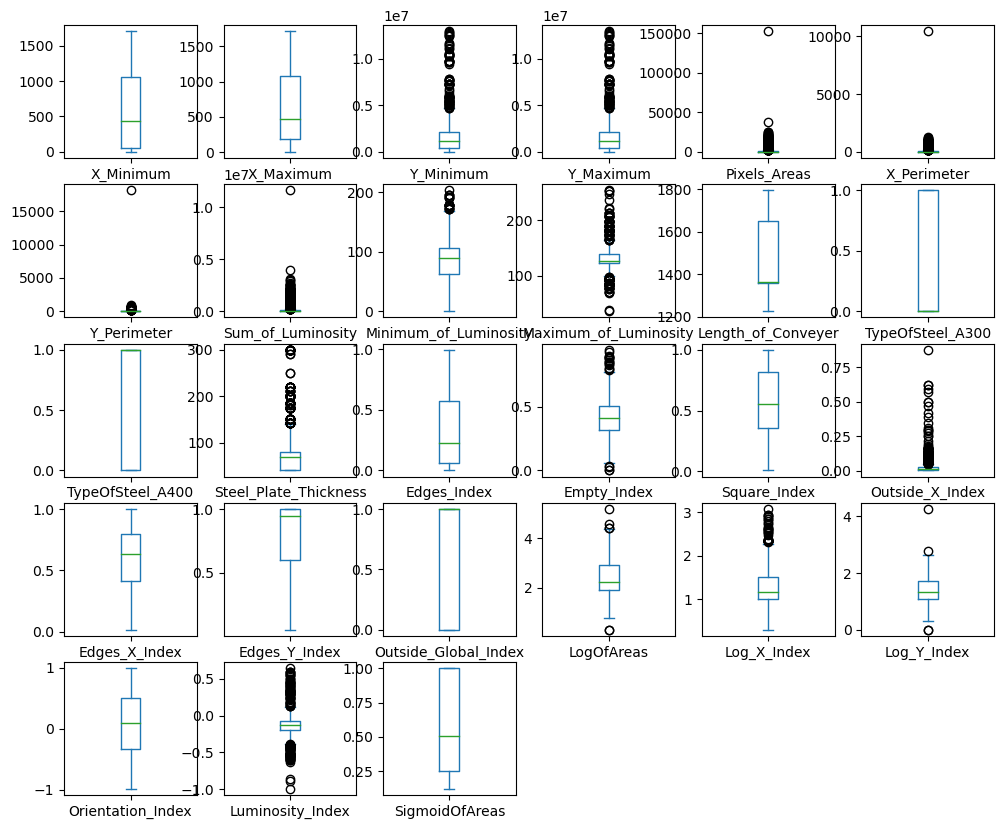

In [15]:
features = data.columns[:-7]
data[features].plot(kind='box',subplots=True,layout=(5,6),figsize=(12,10))
plt.show()

# show balance of labels

<AxesSubplot:>

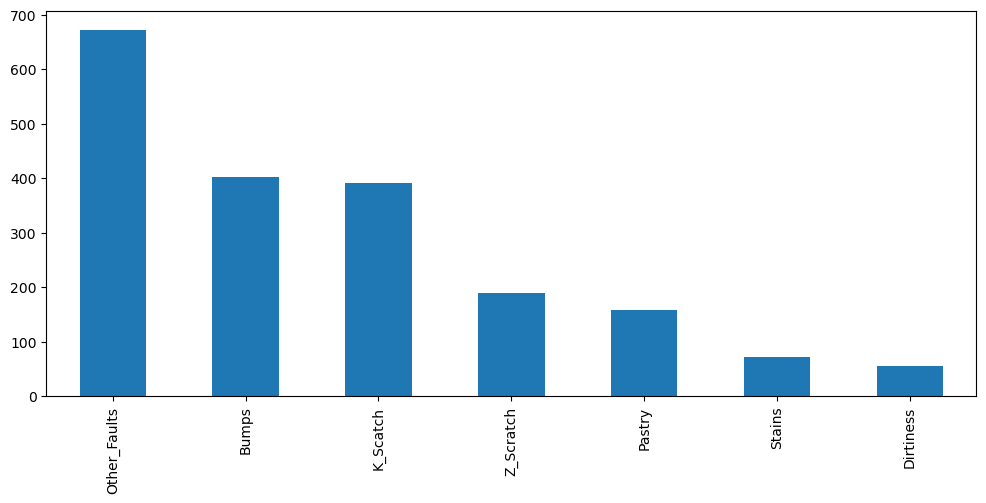

In [16]:
features = data.columns[:-7]
labels = data.columns[-7:]
X = data[features]
y = data[labels]
y.idxmax(axis=1).value_counts().plot(kind='bar',figsize=(12,5))

# Scale data, select features, and split into train and test dataset

In [17]:
# Scale data
s = MinMaxScaler()
data_s = s.fit_transform(data)
data_s = pd.DataFrame(data_s,columns=data.columns)

# Split data into X and y
features = data.columns[:-7]
labels = data.columns[-7:]
X = data_s[features]
y = data_s[labels]

# Train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,shuffle=True)

# Select Best Features

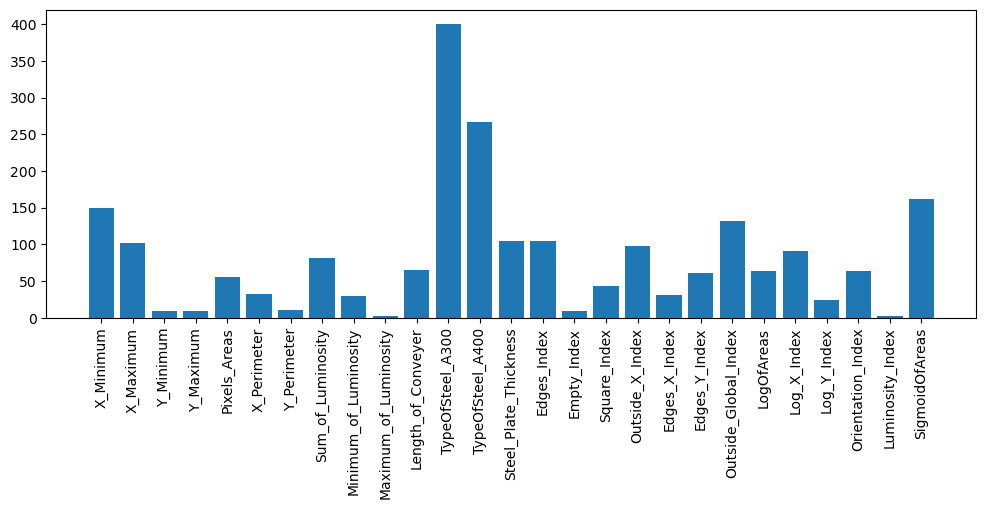

In [18]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
plt.figure(figsize=(12,4))
plt.bar(x=X.columns,height=fit.scores_,)
plt.xticks(rotation=90);

## Create a one-layer neural network in Keras
* 27 inputs -> [8 hidden nodes] -> 7 outputs
* Use categorical cross entropy as the loss metric
* Use 'softmax' activation in the final layer to return probabilities
* Utilize a validation split and plot the loss function to observe any evidence of overfitting

In [19]:
# Classification neural network with Keras
model = Sequential()
model.add(Dense(8, input_dim=Xtrain.shape[1], activation='relu'))
model.add(Dense(ytrain.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', \
              optimizer='adam', metrics=['accuracy'])

# Train model
result = model.fit(Xtrain,ytrain,epochs=1000,\
                   validation_split=0.2,verbose=0)

## Plot the Train and Validation Loss Functions
Generate the train and validation loss functions to determine number of epochs and evidence of overfitting.

Text(0.5, 0, 'Epoch')

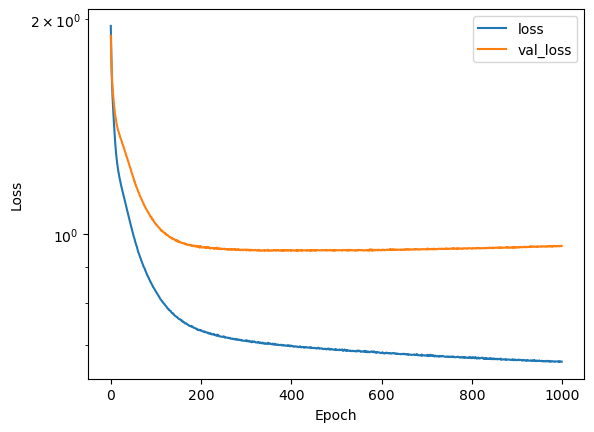

In [20]:
plt.semilogy(result.history['loss'],label='loss')
plt.semilogy(result.history['val_loss'],label='val_loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')

Discussion: Look at the plots for loss. Do you see evidence of overfitting? How many epochs are needed for a good fit? Retrain the model with the proper number of epochs.

# Use test set to analyze model effectiveness
Generate predicted labels and probabilities of those labels.


In [21]:

# Make predictions and save in dataframe
yp = model.predict(Xtest)
yp = pd.DataFrame(yp,columns=ytest.columns)

# Extract predicted labels and probabilities
predicted_label = yp.idxmax(axis=1)
predicted_prob = yp.max(axis=1)
actual_label = ytest.idxmax(axis=1)


# Display probabilities
Display probabilities of faults with the most likely label highlighted and the actual label displayed.



In [22]:
yp['Actual fault'] = actual_label.values
yp.style.highlight_max(axis=1)


TypeError: '>=' not supported between instances of 'float' and 'str'

# Generate confusion matrix

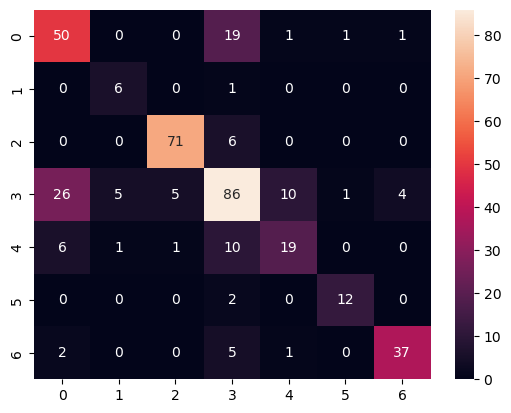

In [23]:
cm = confusion_matrix(predicted_label,actual_label)
sns.heatmap(cm,annot=True)
plt.savefig('confusion_matrix.png',dpi=600)
plt.show()



# Score and Accuracy

In [24]:
score1, acc1 = model.evaluate(Xtrain, ytrain)
score2, acc2 = model.evaluate(Xtest, ytest)

13/13 [==============================] - 0s 2ms/step - loss: 0.8167 - accuracy: 0.7224


# Scikit-Learn Classifiers
Repeat analysis with 8 supervised learning methods. See Classification Overview for additional information on supervised learning methods.


In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier

## Create Models

In [26]:

ada = AdaBoostClassifier()
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
mlp = MLPClassifier(max_iter=10000)
clist = [ada,lr,nb,knn,dt,rf,svc,mlp]
mlist = [None]*8

## Train Models

In [27]:
for i,m in enumerate(clist):
    mlist[i] = MultiOutputClassifier(m).fit(Xtrain,ytrain)

## Train and Test Set Scores

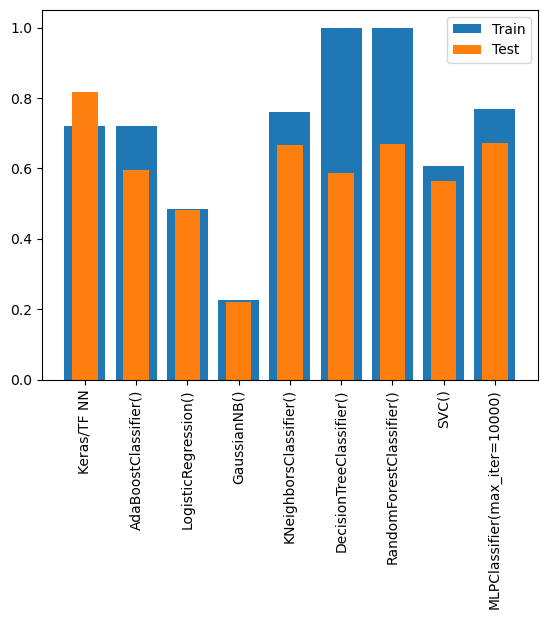

In [28]:
x = pd.DataFrame()
n = ['Keras/TF NN']; s1 = [score1]; s2 = [score2]
for i,m in enumerate(mlist):
    n.append(str(m.estimator))
    s1.append(m.score(Xtrain,ytrain))
    s2.append(m.score(Xtest,ytest))
plt.bar(n,s1,label='Train')
plt.bar(n,s2,width=0.5,label='Test')
plt.xticks(rotation=90)
plt.legend()
plt.show()